#**Python Code Implementation of t-SNE on MNIST Dataset**


#Step 1 :
##Importing Necessary Modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


# Step 2 :
## load the MNIST_test dataset into pandas dataframe

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the data using pandas
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/T5 - Bootcamp/data/mnist_test.csv')

# print first five rows of df
print(df.head())


   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [8]:
# Drop the label feature and
data = df.drop(columns=["label"], axis=1)
# store the pixel data in d.
d = data


# Step 3  :
## Standardize the data

In [9]:
# Data-preprocessing: Standardizing the data
scaler = StandardScaler()

scaled_d = scaler.fit_transform(d)


# Step 4 :  Reduce the columns data to 2 dimensions




In [10]:
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points

data_1000 = scaled_d[:1000]


In [21]:
# Assuming 'label' column exists in the original dataframe 'df'

# Extract labels from the original dataframe

label_1000 = df.loc[:999, "label"]

# Step 5 :
## define the model

In [14]:
tsne = TSNE(n_components=2)

# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000


# Step 6 :
## Fit the model

In [23]:
tsne_data = tsne.fit_transform(data_1000)

# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, label_1000)).T

tsne_df = pd.DataFrame(tsne_data, columns=["Dim_1", "Dim_2", "Label"])


# Step 7 :
##  Plotting the result

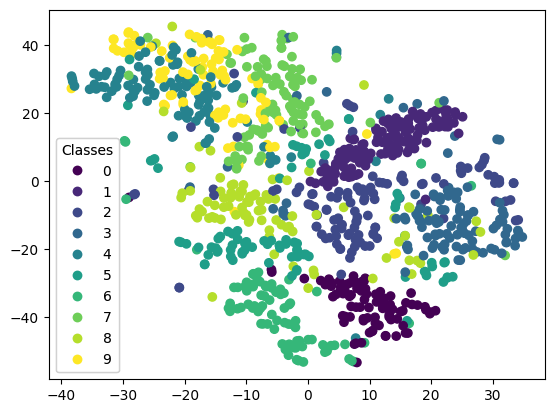

In [28]:
# Plotting the result of tsne
fig, ax = plt.subplots()

# Scatter plot on the axes
scatter = ax.scatter(tsne_df["Dim_1"],tsne_df["Dim_2"] , c=label_1000, cmap='viridis')

# Add a legend with labels for different classes
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(legend1)



#**Well Done**